<a href="https://colab.research.google.com/github/KevinJUBERT/Efrei-M2-BIgData-Analytics-LAB3-project-PySpark-Churn-Analysis/blob/main/LAB3_BDAnalyticsM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://datascientest.com/wp-content/uploads/2021/02/illu_pyspark_blog-84.png)



#**<center> Laboratory III : PySpark<center>**
## **<center> - Part II -<center>**
## <center>*'Churn Analysis'*<center>

![]()</div>

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/Churn-Prediction-scaled.jpg" width="400"><center>


###<center>by ***Kevin JUBERT***<center>




### Installation of PySpark requirements
In this first part I start by installing all the tools required to install and run PySpark correctly

In [ ]:
# install java 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
# unzip the spark file to the current folder 
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

Now that you installed Spark and Java in Colab, it is time to set the environment path which enables you to run Pyspark in your Colab environment. Set the location of Java and Spark by running the following code:</p>

In [ ]:
# set your spark folder to your system path environment. 
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" 
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
# install findspark using pip 
!pip install -q findspark

Here I run a local spark session to test my installation then I import all the .csv file containing the data of the project

In [ ]:
import findspark 
findspark.init() 
from pyspark.sql import SparkSession 
spark = SparkSession.builder.master("local[*]").getOrCreate()

### Importation of Dataframes

In [ ]:
from google.colab import files 
files.upload()

Saving CallsData.csv to CallsData.csv
Saving ContractData.csv to ContractData.csv


{'CallsData.csv': b'VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Phone\n25,265.1,197.4,244.7,10,1,110,45.07,99,16.78,91,11.01,3,2.7,415,382-4657\n26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.7,415,371-7191\n0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.3,104,7.32,5,3.29,415,358-1921\n0,299.4,61.9,196.9,6.6,2,71,50.9,88,5.26,89,8.86,7,1.78,408,375-9999\n0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73,415,330-6626\n0,223.4,220.6,203.9,6.3,0,98,37.98,101,18.75,118,9.18,6,1.7,510,391-8027\n24,218.2,348.5,212.6,7.5,3,88,37.09,108,29.62,118,9.57,7,2.03,510,355-9993\n0,157,103.1,211.8,7.1,0,79,26.69,94,8.76,96,9.53,6,1.92,415,329-9001\n0,184.5,351.6,215.8,8.7,1,97,31.37,80,29.89,90,9.71,4,2.35,408,335-4719\n37,258.6,222,326.4,11.2,0,84,43.96,111,18.87,97,14.69,5,3.02,415,330-8173\n0,129.1,228.5,208.8,12.7,4,137,21.95,83,19.42,111,9.4,6,3.43,4

In [ ]:
!ls

CallsData.csv	  sample_data		     spark-3.0.0-bin-hadoop3.2.tgz
ContractData.csv  spark-3.0.0-bin-hadoop3.2


3. Churn analysis in Spark


The Churn (form English: change and turn) expresses the rate of loss of customers to a company or product. The churn rate represents the percentage of lost customers over a given (usually one year) by the total number of customers at the beginning of this time period. This term is used primarily in the Telecommunications and Banking to measure the part of lost customers and to measure the loyalty to offer a product.
The overall churn includes three causes of stopping the use of the good or service:

    1. Abandonment: If the client does not use the type of product or service.
    
    2. The transition to competition: The customer turns to a directly competing product.
   
    3. The move to another company offer: The customer goes to a different offer, sold by the same company also covering its needs.

    
The churn rate of mobile phones is around 20%. It is therefore critical for mobile operators to detect customers which can terminate their subscription as well as the probable cause of such termination, in order to quickly provide an offer of suitable retention.

3.1 Load the following dataset (it can be interested to concatenate the both datasets before load them):

In [ ]:
datasetCalls    = spark.read.csv('CallsData.csv'   , header =True) 
datasetContract = spark.read.csv('ContractData.csv', header =True) 
datasetCalls.show(5) 
datasetContract.show(5)

+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+---------+--------+
|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|Area Code|   Phone|
+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+---------+--------+
|           25|   265.1|   197.4|     244.7|       10|             1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|      415|382-4657|
|           26|   161.6|   195.5|     254.4|     13.7|             1|      123|     27.47|      103|     16.62|        103|       11.45|         3|        3.7|      415|371-7191|
|            0|   243.4|   121.2|     162.6|     12.2|             0|      114|     41.38|      110|     

In [ ]:
#Starting by joining the two dataframes
datasetCalls = datasetCalls.drop("Area Code") # Drop double columns after merging
df = datasetContract.join(datasetCalls,datasetContract.Phone ==  datasetCalls.Phone,"inner").drop(datasetCalls.Phone).drop(datasetContract.Phone)

In [ ]:
df.show(5)

+--------------+-----+----------+----------+-----+---------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+
|Account Length|Churn|Int'l Plan|VMail Plan|State|Area Code|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|
+--------------+-----+----------+----------+-----+---------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+
|           128|    0|         0|         1|   KS|      415|           25|   265.1|   197.4|     244.7|       10|             1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|
|           107|    0|         0|         1|   OH|      415|           26|   161.6|   195.5|     254.4|     13.7|           

In [ ]:
# Drop columns Area code
df = df.drop('Area Code')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

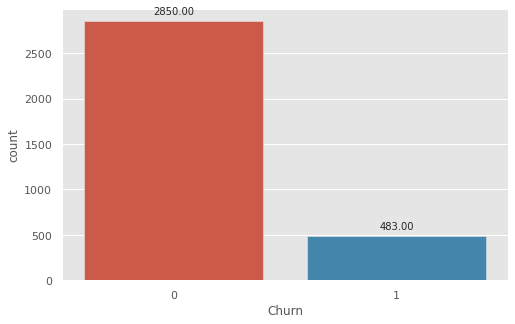

In [ ]:
sns.set(rc = {'figure.figsize':(8,5)})
plt.style.use('ggplot')
count =  tuple(df.toPandas()['Churn'].value_counts())
plot = sns.countplot(x='Churn', data=df.toPandas())
for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

There are **483** churn users in total in this data set on **3333** users of the company. 

That's about **14,50 %** of churn rate

3.2 Partitioning of dataset describing customers

A possible first step for this kind of analysis is the automatic partitioning (clustering) of data describing customers. It is assumed that each customer is described by a score of relevant numerical values and a follow-up study allows us to know the old customers who "churned" and under what conditions.

### **a. Does this data are univariate or multivariate ?**



---
---


Here the subject of the study is to determine the reason why some old customers become "Churn" and that imply at least to realise an analysis on the period length of the account and the costumer who churned then deduce their consumption behaviour.

Consequently it's means that condition of the analysis require to consider that data are **multivariate**.

---
---



In [ ]:
# Mapping of string values
from pyspark.ml.feature import StringIndexer

state = StringIndexer(inputCol="State", outputCol="State_Map") 
indexer = state.fit(df)
df = indexer.transform(df)
df = df.drop("State")

In [ ]:
df.show(5)

+--------------+-----+----------+----------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+---------+
|Account Length|Churn|Int'l Plan|VMail Plan|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|State_Map|
+--------------+-----+----------+----------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+---------+
|           128|    0|         0|         1|           25|   265.1|   197.4|     244.7|       10|             1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|     16.0|
|           107|    0|         0|         1|           26|   161.6|   195.5|     254.4|     13.7|             1|      123|     27.47|      103|     

### **b. One of the first step here, is to use the normalization before cluster the data. It is necessary to use a normalization here ? Justify the answer ?**

In [ ]:
# Parse data columns into int and float values

int_col   =  ['Account Length','Churn',"Int'l Plan",'VMail Plan','VMail Message','CustServ Calls','Day Calls','Eve Calls','Night Calls','Intl Calls','Night Charge','Intl Charge']
float_col =  ['Day Mins','Eve Mins','Night Mins','Intl Mins', 'Day Charge','Eve Charge']
  
for x in int_col :
  df = df.withColumn(x, df[x].cast('int')) 

for x in float_col :
  df = df.withColumn(x, df[x].cast('float')) 

To have an Idea about the type and the frequency of usage of the costumer I start by summing the number of calls, the time of calls and the charges that they pay for this service since the creation of their account

In [ ]:
# SUM User calls, Charge, Time in munites
df  = df.withColumn('Total Calls'    , df['Day Calls']   +  df['Eve Calls']   + df['Night Calls']   + df['Intl Calls'])
df  = df.withColumn('Total Charges'  , df['Day Charge']  +  df['Eve Charge']  + df['Night Charge']  + df['Intl Charge'])
df  = df.withColumn('Total Mins'     , df['Day Mins']    +  df['Eve Mins']    + df['Night Mins']    + df['Intl Mins'])

In [ ]:
df.printSchema()

root
 |-- Account Length: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- Int'l Plan: integer (nullable = true)
 |-- VMail Plan: integer (nullable = true)
 |-- VMail Message: integer (nullable = true)
 |-- Day Mins: float (nullable = true)
 |-- Eve Mins: float (nullable = true)
 |-- Night Mins: float (nullable = true)
 |-- Intl Mins: float (nullable = true)
 |-- CustServ Calls: integer (nullable = true)
 |-- Day Calls: integer (nullable = true)
 |-- Day Charge: float (nullable = true)
 |-- Eve Calls: integer (nullable = true)
 |-- Eve Charge: float (nullable = true)
 |-- Night Calls: integer (nullable = true)
 |-- Night Charge: integer (nullable = true)
 |-- Intl Calls: integer (nullable = true)
 |-- Intl Charge: integer (nullable = true)
 |-- State_Map: double (nullable = false)
 |-- Total Calls: integer (nullable = true)
 |-- Total Charges: float (nullable = true)
 |-- Total Mins: float (nullable = true)



Our study is focusing on old customers who Churned so bellow I am going to calculate the median value of the account length column and keep the value above. 

Indirectly I am considering that 50% of the customer are 'old customer'.

In [ ]:
import plotly.express as px

fig = px.box(df.toPandas(), x='Account Length', width=1200, height=400, template="plotly_dark")
fig.show()

In [ ]:
acount_length_median = df.toPandas()['Account Length'].median()
f"Customer having an account length superior to {acount_length_median} are now considered as old costumer"

'Customer having an account length superior to 101.0 are now considered as old costumer'

In [ ]:
df = df.filter(df['Account Length'] > acount_length_median )
df.show()

+--------------+-----+----------+----------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+---------+-----------+-------------+----------+
|Account Length|Churn|Int'l Plan|VMail Plan|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|State_Map|Total Calls|Total Charges|Total Mins|
+--------------+-----+----------+----------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+---------+-----------+-------------+----------+
|           128|    0|         0|         1|           25|   265.1|   197.4|     244.7|     10.0|             1|      110|     45.07|       99|     16.78|         91|          11|         3|          2|     16.0|        303|        74.85|     717.2|


There I reduce the dimension by selecting the columns of my dataset, and I keep for features the account length, the states index, all the call deduced values and the Churn state.


In [ ]:
df = df.select(['Account Length',"Churn", 'State_Map','Total Calls', 'Total Charges', 'Total Mins'])

In [ ]:
print("***   Means Values of features :  ***")
print("______________________________________")
means = df.toPandas().mean()
round(means.to_frame(),2).T

***   Means Values of features :  ***
______________________________________


,Account Length,Churn,State_Map,Total Calls,Total Charges,Total Mins
0,133.62,0.15,22.68,305.7,58.62,592.02


In [ ]:
import seaborn as sns

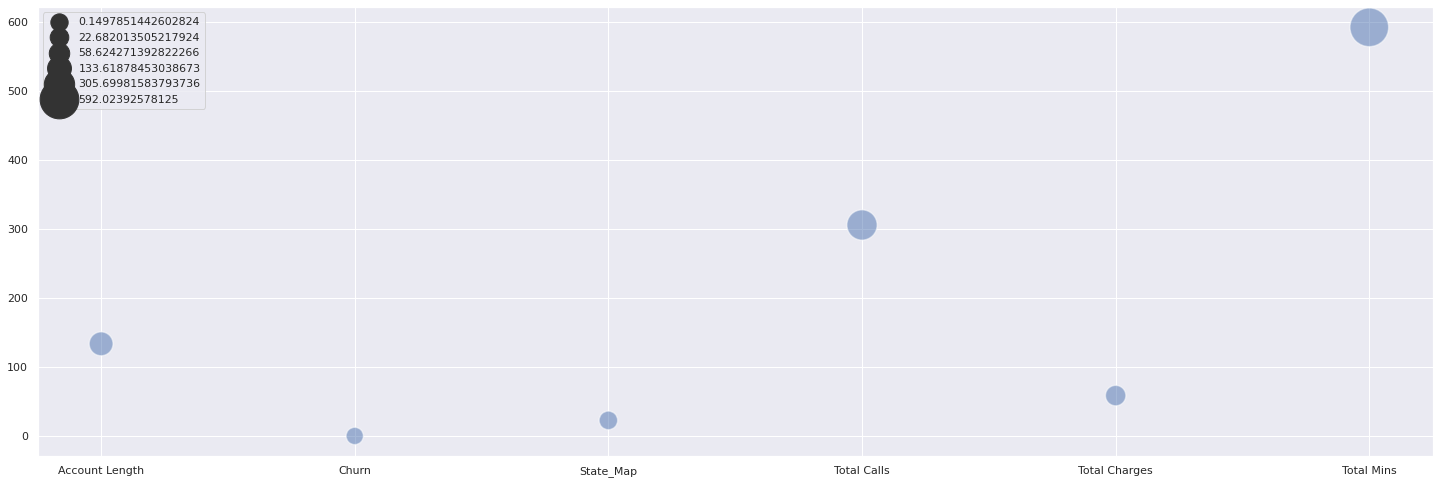

In [ ]:
# Describe the numeric value of the dataframe
from seaborn import scatterplot

sns.set(rc={'figure.figsize':(25,8.27)})
chart = scatterplot(x=df.columns, y=means ,size = means,sizes=(300, 1500), alpha=.5, palette="hls")

---

---

By analysis of the means value of the numerical columns of the dataframe we notice an no negligeable difference of value range (almost 600).

This difference of magnitude imply to uniformy data's scale value.


---



---





---

---

By analysis of the means and the standard deviation values of the numericals columns of the dataframe we notice an no negligeable difference of range of values (almost 1000).
This difference of magnitude implies to uniformy by normalize data's scale values.

As explained and listed here :  https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0 there are several types of normalization, among this list I have decided to apply a Standardisation Normalisation to get value varying between 0 and 1.



> ![](https://miro.medium.com/max/1400/1*_xnna2P4MHKDtWHBpaWtfg.png)

Let's apply this formula below ...


---



---





In [ ]:
features_list =df.columns
features_list.remove('Churn')

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
assembler = VectorAssembler(inputCols=features_list,outputCol="features")
df= assembler.transform(df)

In [ ]:
from pyspark.ml.feature import Normalizer

normalizer = Normalizer(inputCol="features", outputCol="norm_features", p=1.0)
df = normalizer.transform(df)

In [ ]:
print(" Normalized vector : \n")
finalized_data = df.select(['norm_features','Churn'])
finalized_data.show()

 Normalized vector : 

+--------------------+-----+
|       norm_features|Churn|
+--------------------+-----+
|[0.10330495048350...|    0|
|[0.09500217424092...|    0|
|[0.12556366587230...|    0|
|[0.10129363927126...|    0|
|[0.09094256761896...|    0|
|[0.15069967223951...|    0|
|[0.09228148380407...|    0|
|[0.10553655121402...|    0|
|[0.17875762869411...|    0|
|[0.11732128973810...|    1|
|[0.12312176977498...|    0|
|[0.13548581897016...|    0|
|[0.11703428381623...|    0|
|[0.12763118743381...|    0|
|[0.13995237985979...|    0|
|[0.13931949116181...|    0|
|[0.14998387088790...|    0|
|[0.12826437396231...|    0|
|[0.13052200305477...|    0|
|[0.13425355160511...|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler


df_scaled = df.drop().drop('norm_features').drop('Churn')
scaler = StandardScaler(
    inputCol = 'features', 
    outputCol = 'scaledFeatures',
    withMean = True,
    withStd = True
).fit(df_scaled)

# when we transform the dataframe, the old
# feature will still remain in it
df_scaled = scaler.transform(df_scaled)
df_scaled.show(6)

+--------------+---------+-----------+-------------+----------+--------------------+--------------------+
|Account Length|State_Map|Total Calls|Total Charges|Total Mins|            features|      scaledFeatures|
+--------------+---------+-----------+-------------+----------+--------------------+--------------------+
|           128|     16.0|        303|        74.85|     717.2|[128.0,16.0,303.0...|[-0.2296432275362...|
|           107|      4.0|        332|        58.09|     625.2|[107.0,4.0,332.0,...|[-1.0879263227822...|
|           137|     20.0|        333|        61.68| 539.39996|[137.0,20.0,333.0...|[0.13819238471206...|
|           118|      3.0|        323|    66.729996|     654.2|[118.0,3.0,323.0,...|[-0.6383494633676...|
|           121|     24.0|        321|        77.71| 786.80005|[121.0,24.0,321.0...|[-0.5157375926182...|
|           147|     29.0|        275|        45.45| 479.00003|[147.0,29.0,275.0...|[0.54689862054351...|
+--------------+---------+-----------+--------

### **C. Apply the k means algorithm with Spark by choosing a different number of clusters. Can you deduce the best number of clusters to group the similar customers ?**


In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
eval =  ClusteringEvaluator(
    predictionCol     = "prediction",
    featuresCol       = "norm_features",
    metricName        = "silhouette",
    distanceMeasure   = "squaredEuclidean"
)

In [ ]:
y = []
for i in range(2,11):

  kmeans = KMeans(featuresCol='norm_features').setK(i).setSeed(1)
  model =  kmeans.fit(finalized_data)

  predictions = model.transform(finalized_data)
  #predictions.show()

  score =  eval.evaluate(predictions)
  print("K = ",i," |", round(score,4)*100, "%")
  y.append(round(score,4)*100)

K =  2  | 58.77 %
K =  3  | 47.14 %
K =  4  | 45.69 %
K =  5  | 44.22 %
K =  6  | 40.88 %
K =  7  | 39.53 %
K =  8  | 36.42 %
K =  9  | 37.96 %
K =  10  | 36.66 %


In [ ]:
import plotly.express as px

In [ ]:
title="K factor evaluating"
fig = px.line(x=list(range(2,11)), y=y, width=1500, height=600,  template="plotly_dark", title=title,
             
             labels={
                 "x": "K factor",
                 "y": "Evaluation result (in %)"
                     }   
             )
fig.show()

By visualisation we can deduce that ....

In [ ]:
print(f"K = {y.index(max(y))+2} is the best factor of our Kmeans clustering")

K = 2 is the best factor of our Kmeans clustering


3.3 Visualization and analysis of obtained clustering

The second step for this problem would be to visualize and analyze the partitions.

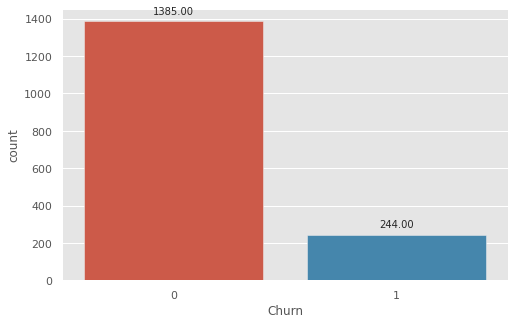

In [ ]:
sns.set(rc = {'figure.figsize':(8,5)})
plt.style.use('ggplot')
count =  tuple(df.toPandas()['Churn'].value_counts())
plot = sns.countplot(x='Churn', data=df.toPandas())
for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### **3.3 Visualization and analysis of obtained clustering**

The second step for this problem would be to visualize and analyze the partitions.

### d. Why a dimension reduction method is well suited for this task and how a visualization can help understanding this problem?

A dimension reduction like a PCA is well suite for a problem like this because we have a multivariate variable problem and it may facilitate a clusterisation and reduce the time of computation.


It will also show how much the features are influencing the Chur factor are increase the accuracy of the prediction.

### e. You can choose any reduction method in order to be able to visualize in 2 dimensions the data : https://spark.apache.org/docs/latest/mllib--dimensionality--reduction

In [ ]:
df_pca = df.select(['features','norm_features'])
df_pca.show()

+--------------------+--------------------+
|            features|       norm_features|
+--------------------+--------------------+
|[128.0,16.0,303.0...|[0.10330495048350...|
|[107.0,4.0,332.0,...|[0.09500217424092...|
|[137.0,20.0,333.0...|[0.12556366587230...|
|[118.0,3.0,323.0,...|[0.10129363927126...|
|[121.0,24.0,321.0...|[0.09094256761896...|
|[147.0,29.0,275.0...|[0.15069967223951...|
|[117.0,47.0,271.0...|[0.09228148380407...|
|[141.0,0.0,297.0,...|[0.10553655121402...|
|[168.0,49.0,297.0...|[0.17875762869411...|
|[161.0,2.0,301.0,...|[0.11732128973810...|
|[147.0,28.0,347.0...|[0.12312176977498...|
|[130.0,27.0,308.0...|[0.13548581897016...|
|[111.0,36.0,316.0...|[0.11703428381623...|
|[132.0,7.0,275.0,...|[0.12763118743381...|
|[174.0,34.0,308.0...|[0.13995237985979...|
|[142.0,39.0,312.0...|[0.13931949116181...|
|[172.0,47.0,324.0...|[0.14998387088790...|
|[136.0,46.0,318.0...|[0.12826437396231...|
|[149.0,20.0,303.0...|[0.13052200305477...|
|[135.0,17.0,285.0...|[0.1342535

In [ ]:
# build PCA model
from pyspark.ml.feature import PCA

pca = PCA(k=2, inputCol="norm_features", outputCol="pcaFeatures")
pcaModel = pca.fit(df_pca)

print("\n====     Eigenvector   ====\n")
print(pcaModel.pc)

print("\n====   Contribution rate   ====\n")
print(pcaModel.explainedVariance)

pca_score = pcaModel.transform(df_pca).select("pcaFeatures")

print("\n====   Main component score    ====\n")
pca_score.show(truncate=False)


====     Eigenvector   ====

DenseMatrix([[-0.21379148,  0.7760563 ],
             [-0.03871125,  0.05912991],
             [-0.59701486, -0.58305733],
             [ 0.08159132, -0.01999856],
             [ 0.76792627, -0.23213032]])

====   Contribution rate   ====

[0.7612649264139275,0.1701806675715043]

====   Main component score    ====

+------------------------------------------+
|pcaFeatures                               |
+------------------------------------------+
|[0.28084713494201735,-0.19722032512164678]|
|[0.23404956145121608,-0.2278188402867405] |
|[0.17448981956569293,-0.19531141939250524]|
|[0.24863522331269305,-0.2144074271567495] |
|[0.29470297986470895,-0.20746457929208695]|
|[0.1792157101329637,-0.16058750511303654] |
|[0.3165621097155384,-0.19121532270929398] |
|[0.319882561825124,-0.19106577029485866]  |
|[0.08995477036064214,-0.1386349002071425] |
|[0.30637601169039874,-0.176236704419498]  |
|[0.19824777475142744,-0.19290260535206794]|
|[0.14023620989608818,

In [ ]:
eval =  ClusteringEvaluator(
    predictionCol     = "prediction",
    featuresCol       = "pcaFeatures",
    metricName        = "silhouette",
    distanceMeasure   = "squaredEuclidean"
)

In [ ]:
y = []
for i in range(2,11):

  kmeans = KMeans(featuresCol="pcaFeatures").setK(i).setSeed(1)
  model =  kmeans.fit(pca_score)

  predictions = model.transform(pca_score)
  #predictions.show()

  score =  eval.evaluate(predictions)
  print("K = ",i," |", round(score,4)*100, "%")
  y.append(round(score,4)*100)

K =  2  | 61.89 %
K =  3  | 51.55 %
K =  4  | 45.660000000000004 %
K =  5  | 50.870000000000005 %
K =  6  | 49.58 %
K =  7  | 49.8 %
K =  8  | 46.489999999999995 %
K =  9  | 47.160000000000004 %
K =  10  | 47.74 %


In [ ]:
title="K factor evaluating"
fig = px.line(x=list(range(2,11)), y=y, width=1500, height=600,  template="plotly_dark", title=title,
             
             labels={
                 "x": "K factor",
                 "y": "Evaluation result (in %)"
                     }   
             )
fig.show()

By visualisation we can deduce that ....

In [ ]:
print(f"K = {y.index(max(y))+2} is the best factor of our Kmeans clustering")

K = 2 is the best factor of our Kmeans clustering


With the PCA method with 2 columns we obtain a better accuracy result of prediction with a score over 60% 

## **Conculsion** 
 
 Reasons why old customer Churn

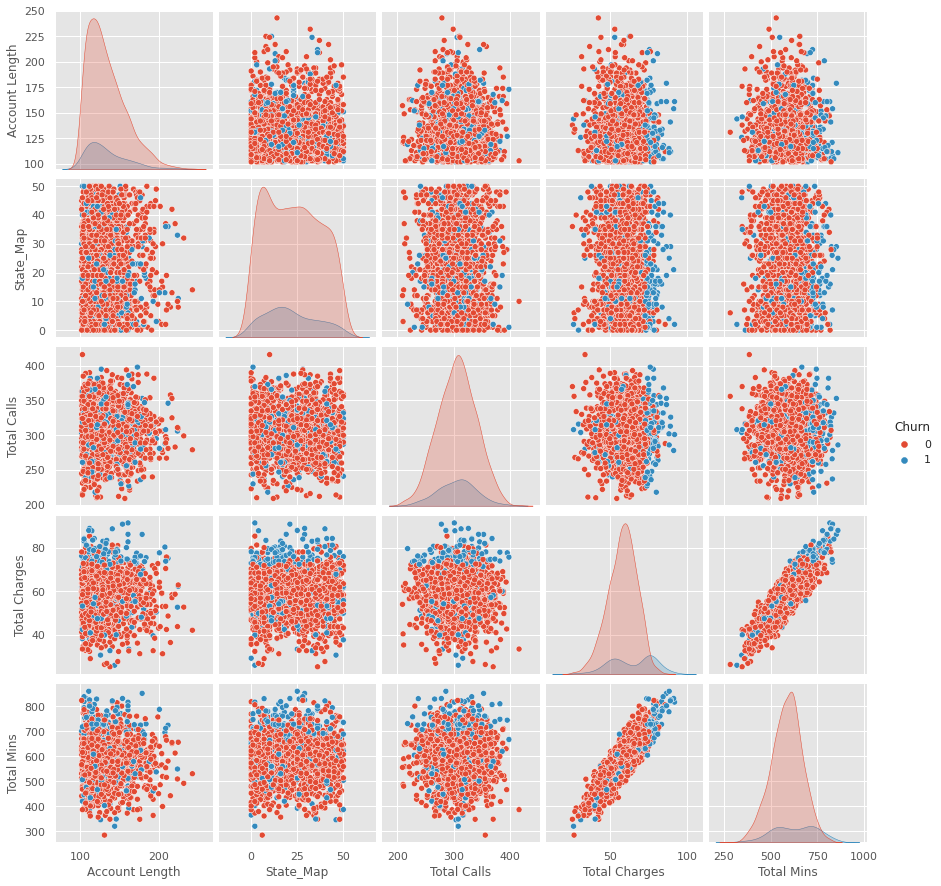

In [ ]:
sns.pairplot(df.drop('features').drop('norm_features').toPandas(), hue="Churn")


*   This visualisation provide a lot of information about why old customer decide to Churn, for example these who are making **calls over 700 min since the begining of their souscription are more suceptible to Churn.**

*   This result can be explain because of the fact that the relation existing between total charges and total mins of call in this plot show that **Total charges increase lineary with the call consumption.**

*   Obviously like we could supposed **more the charges are important more people are Churning** especially over around a charge amount of 70$.

*  However the location doesn't seem to have a real influence on the length of souscription but we notice that the **consumption is more important according to the region**







**by Kevin JUBERT**<br>
https://github.com/KevinJUBERT